<a href="https://colab.research.google.com/github/Ivonne9140/ML_Ivonne/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
url='https://raw.githubusercontent.com/Ivonne9140/ML_Ivonne/main/test_set.csv'
df=pd.read_csv(url)
df['Fault']=df['Fault'].map({
    '0': 'Pass',
    'sa0':'sa0',
    'sa1':'sa1',
    'sr':'sr',
    'sf':'sf'
})
labels = df['Fault'].tolist()
df['Class']=labels
print (df)

    Vector  Cell  Expected  Actual Fault Class
0        1     1         0       0  Pass  Pass
1        1     2         0       0  Pass  Pass
2        1     3         1       0   sa0   sa0
3        1     4         1       0   sa0   sa0
4        1     5         0       0  Pass  Pass
5        1     6         0       0  Pass  Pass
6        1     7         1       0   sa0   sa0
7        1     8         1       0   sa0   sa0
8        1     9         0       0  Pass  Pass
9        1    10         0       0  Pass  Pass
10       1    11         1       0   sa0   sa0
11       1    12         1       0   sa0   sa0
12       2     1         0       1   sa1   sa1
13       2     2         0       1   sa1   sa1
14       2     3         1       1  Pass  Pass
15       2     4         1       1  Pass  Pass
16       2     5         0       1   sa1   sa1
17       2     6         0       1   sa1   sa1
18       2     7         1       1  Pass  Pass
19       2     8         1       1  Pass  Pass
20       2   

In [4]:
target_names = ['sa0','sa1','Pass','sf','sr']
#df['Fault_type']=df.Class.apply(lambda x:target_names[x])
#print(df)

In [5]:
df1=df[df.Class=='sa0']
df2=df[df.Class=='sa1']
df3=df[df.Class=='Pass']
df4=df[df.Class=='sf']
df5=df[df.Class=='sr']


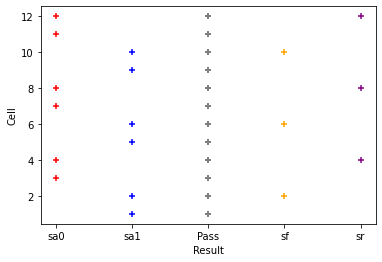

In [10]:
plt.xlabel('Result')
plt.ylabel('Cell')
plt.scatter(df1['Fault'],df1['Cell'], color='red',marker='+')
plt.scatter(df2['Fault'],df2['Cell'], color='blue',marker='+')
plt.scatter(df3['Fault'],df3['Cell'], color='green',marker='+')
plt.scatter(df4['Fault'],df4['Cell'], color='orange',marker='+')
plt.scatter(df5['Fault'],df5['Cell'], color='purple',marker='+')
plt.scatter(df3['Fault'],df3['Cell'], color='gray',marker='+')

In [13]:
x=df.drop(['Class','Fault'],axis='columns')
print(x)

    Vector  Cell  Expected  Actual
0        1     1         0       0
1        1     2         0       0
2        1     3         1       0
3        1     4         1       0
4        1     5         0       0
5        1     6         0       0
6        1     7         1       0
7        1     8         1       0
8        1     9         0       0
9        1    10         0       0
10       1    11         1       0
11       1    12         1       0
12       2     1         0       1
13       2     2         0       1
14       2     3         1       1
15       2     4         1       1
16       2     5         0       1
17       2     6         0       1
18       2     7         1       1
19       2     8         1       1
20       2     9         0       1
21       2    10         0       1
22       2    11         1       1
23       2    12         1       1
24       3     1         0       0
25       3     2         0       0
26       3     3         1       1
27       3     4    

In [14]:
y=df.Class

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)


In [16]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

36
12
36
12


In [17]:
model = SVC(kernel='linear') #Support Vector Classifier

In [18]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
predictions=model.predict(x_test)
print (predictions)

['Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'sa0' 'sa0' 'sa0'
 'Pass']


In [20]:
percentage = model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


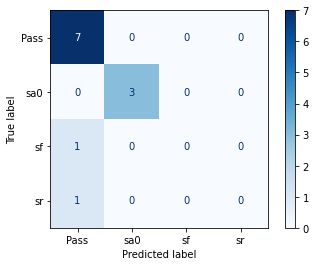

Confusion Matrix
[[7 0 0 0]
 [0 3 0 0]
 [1 0 0 0]
 [1 0 0 0]]
Test Set: 12
Accuracy = 83.33333333333334 %


In [22]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
plot_confusion_matrix(model,x_test, y_test, cmap=plt.cm.Blues)
plt.show()
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(x_test)}")
print(f"Accuracy = {percentage*100} %")

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Pass       0.78      1.00      0.88         7
         sa0       1.00      1.00      1.00         3
          sf       0.00      0.00      0.00         1
          sr       0.00      0.00      0.00         1

    accuracy                           0.83        12
   macro avg       0.44      0.50      0.47        12
weighted avg       0.70      0.83      0.76        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
